# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

### Brief Summary

This project aims to utilize mobility and population data at different times to identify optimal locations for mobile vendors in Taipei City, Taiwan.

1. YouBike 2.0 (bike-sharing system) Real-Time Data
2. Top 10 most used/busiest YouBike 2.0 stations: December, 2023
3. Taipei City Population by District: Jan, 2022
   
were introduced to study the spatial and temporial aspects of different districts.

1. Taipei Metro Station Hourly Inbound and Outbound Traffic Statistics
2. Commercial Statistics

might be introduced to study the dynamics of urban lives in the future.

In [ ]:
pip install mapboxgl

In [38]:
import pandas as pd
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint    # library for cleanly printing Python data structures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pp = pprint.PrettyPrinter()

### YouBike 2.0 Real-Time Data

In [2]:
endpoint_url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"
response = requests.get(endpoint_url)

In [3]:
results = response.text
print(type(results))
print(results[:500])

<class 'str'>
[{"sno":"500101001","sna":"YouBike2.0_捷運科技大樓站","tot":28,"sbi":8,"sarea":"大安區","mday":"2024-03-11 15:10:28","lat":25.02605,"lng":121.5436,"ar":"復興南路二段235號前","sareaen":"Daan Dist.","snaen":"YouBike2.0_MRT Technology Bldg. Sta.","aren":"No.235， Sec. 2， Fuxing S. Rd.","bemp":20,"act":"1","srcUpdateTime":"2024-03-11 15:10:30","updateTime":"2024-03-11 15:10:26","infoTime":"2024-03-11 15:10:28","infoDate":"2024-03-11"},{"sno":"500101002","sna":"YouBike2.0_復興南路二段273號前","tot":21,"sbi":6,"sarea":"大安區","md


In [4]:
# parse the string into a Python dictionary (loads = "load string")
data = json.loads(results)
print(type(data))
print(data[:3]) # look at the first three items from the selection of the list

<class 'list'>
[{'sno': '500101001', 'sna': 'YouBike2.0_捷運科技大樓站', 'tot': 28, 'sbi': 8, 'sarea': '大安區', 'mday': '2024-03-11 15:10:28', 'lat': 25.02605, 'lng': 121.5436, 'ar': '復興南路二段235號前', 'sareaen': 'Daan Dist.', 'snaen': 'YouBike2.0_MRT Technology Bldg. Sta.', 'aren': 'No.235， Sec. 2， Fuxing S. Rd.', 'bemp': 20, 'act': '1', 'srcUpdateTime': '2024-03-11 15:10:30', 'updateTime': '2024-03-11 15:10:26', 'infoTime': '2024-03-11 15:10:28', 'infoDate': '2024-03-11'}, {'sno': '500101002', 'sna': 'YouBike2.0_復興南路二段273號前', 'tot': 21, 'sbi': 6, 'sarea': '大安區', 'mday': '2024-03-11 14:57:19', 'lat': 25.02565, 'lng': 121.54357, 'ar': '復興南路二段273號西側', 'sareaen': 'Daan Dist.', 'snaen': 'YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.', 'aren': 'No.273， Sec. 2， Fuxing S. Rd. (West)', 'bemp': 15, 'act': '1', 'srcUpdateTime': '2024-03-11 15:10:30', 'updateTime': '2024-03-11 15:10:26', 'infoTime': '2024-03-11 14:57:19', 'infoDate': '2024-03-11'}, {'sno': '500101003', 'sna': 'YouBike2.0_國北教大實小東側門', 'tot': 16, 's

In [5]:
df = pd.read_json(endpoint_url)
df.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,srcUpdateTime,updateTime,infoTime,infoDate
0,500101001,YouBike2.0_捷運科技大樓站,28,8,大安區,2024-03-11 15:10:28,25.02605,121.54360,復興南路二段235號前,Daan Dist.,YouBike2.0_MRT Technology Bldg. Sta.,No.235， Sec. 2， Fuxing S. Rd.,20,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11
1,500101002,YouBike2.0_復興南路二段273號前,21,6,大安區,2024-03-11 14:57:19,25.02565,121.54357,復興南路二段273號西側,Daan Dist.,YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.,No.273， Sec. 2， Fuxing S. Rd. (West),15,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:57:19,2024-03-11
2,500101003,YouBike2.0_國北教大實小東側門,16,5,大安區,2024-03-11 14:44:19,25.02429,121.54124,和平東路二段96巷7號,Daan Dist.,YouBike2.0_NTUE Experiment Elementary School (...,No. 7， Ln. 96， Sec. 2， Heping E. Rd,11,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:44:19,2024-03-11
3,500101004,YouBike2.0_和平公園東側,11,9,大安區,2024-03-11 14:58:19,25.02351,121.54282,和平東路二段118巷33號,Daan Dist.,YouBike2.0_Heping Park (East),No. 33， Ln. 118， Sec. 2， Heping E. Rd,2,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:58:19,2024-03-11
4,500101005,YouBike2.0_辛亥復興路口西北側,16,13,大安區,2024-03-11 15:10:28,25.02153,121.54299,復興南路二段368號,Daan Dist.,YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...,No. 368， Sec. 2， Fuxing S. Rd.,3,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11


In [6]:
df.shape

(1345, 18)

In [7]:
# Check for missing values in each row of the DataFrame
missing_values = df.isnull().any(axis=1)

# Print rows with missing values
rows_with_missing_values = df[missing_values]
print(rows_with_missing_values)

Empty DataFrame
Columns: [sno, sna, tot, sbi, sarea, mday, lat, lng, ar, sareaen, snaen, aren, bemp, act, srcUpdateTime, updateTime, infoTime, infoDate]
Index: []


In [8]:
# Unique District Names
unique_sareaen = df['sareaen'].unique()
print(unique_sareaen)
print()
print("Number of Districts in Taipei City: ", len(unique_sareaen))

['Daan Dist.' 'Datong Dist' 'Shilin Dist' 'Wenshan Dist' 'Zhongzheng Dist'
 'Zhongshan Dist' 'Neihu Dist' 'Beitou Dist' 'Songshan Dist'
 'Nangang Dist' 'Xinyi Dist' 'Wanhua Dist' 'NTU Dist']

Number of Districts in Taipei City:  13


In [9]:
# Replace "Daan Dist." with "Daan Dist" in the "sareaen" column
df['sareaen'] = df['sareaen'].replace('Daan Dist.', 'Daan Dist')

In [10]:
# Group by 'sareaen' column and aggregate other columns as needed
grouped_df = df.groupby('sareaen').size().reset_index(name='num_stations')
grouped_df = grouped_df.sort_values(by='num_stations', ascending=False)
grouped_df = grouped_df.reset_index(drop=True)

# Print the new DataFrame
print(grouped_df)

            sareaen  num_stations
0         Daan Dist           172
1        Neihu Dist           160
2    Zhongshan Dist           146
3       Shilin Dist           118
4   Zhongzheng Dist           115
5        Xinyi Dist           104
6      Wenshan Dist            89
7      Nangang Dist            88
8       Beitou Dist            86
9     Songshan Dist            83
10      Wanhua Dist            71
11      Datong Dist            60
12         NTU Dist            53


In [11]:
df = df.rename(columns={'lng': 'lon','tot': 'total', 'sbi': 'current num_bikes'})
df_Daan = df[df['sareaen'] == 'Daan Dist']
df_Daan

,sno,sna,total,current num_bikes,sarea,mday,lat,lon,ar,sareaen,snaen,aren,bemp,act,srcUpdateTime,updateTime,infoTime,infoDate
0,500101001,YouBike2.0_捷運科技大樓站,28,8,大安區,2024-03-11 15:10:28,25.02605,121.54360,復興南路二段235號前,Daan Dist,YouBike2.0_MRT Technology Bldg. Sta.,No.235， Sec. 2， Fuxing S. Rd.,20,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11
1,500101002,YouBike2.0_復興南路二段273號前,21,6,大安區,2024-03-11 14:57:19,25.02565,121.54357,復興南路二段273號西側,Daan Dist,YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.,No.273， Sec. 2， Fuxing S. Rd. (West),15,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:57:19,2024-03-11
2,500101003,YouBike2.0_國北教大實小東側門,16,5,大安區,2024-03-11 14:44:19,25.02429,121.54124,和平東路二段96巷7號,Daan Dist,YouBike2.0_NTUE Experiment Elementary School (...,No. 7， Ln. 96， Sec. 2， Heping E. Rd,11,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:44:19,2024-03-11
3,500101004,YouBike2.0_和平公園東側,11,9,大安區,2024-03-11 14:58:19,25.02351,121.54282,和平東路二段118巷33號,Daan Dist,YouBike2.0_Heping Park (East),No. 33， Ln. 118， Sec. 2， Heping E. Rd,2,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:58:19,2024-03-11
4,500101005,YouBike2.0_辛亥復興路口西北側,16,13,大安區,2024-03-11 15:10:28,25.02153,121.54299,復興南路二段368號,Daan Dist,YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...,No. 368， Sec. 2， Fuxing S. Rd.,3,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,500101227,YouBike2.0_復興忠孝東路口(東南側),28,23,大安區,2024-03-11 14:58:19,25.04061,121.54389,復興南路一段191號前,Daan Dist,YouBike2.0_Zhongxiao E. Rd. & Fuxing S. Rd. In...,No. 191， Sec. 1， Fuxing S. Rd.,5,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:58:19,2024-03-11
168,500101228,YouBike2.0_仁愛大安路口(東北側),21,16,大安區,2024-03-11 15:08:20,25.03813,121.54631,仁愛路四段37號前,Daan Dist,YouBike2.0_Ren'ai Rd. & Da'an Rd. Intersection...,No. 37， Sec. 4， Ren'ai Rd.,5,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:08:20,2024-03-11
169,500101229,YouBike2.0_臺灣師範大學(浦城街),15,12,大安區,2024-03-11 15:06:19,25.02476,121.52803,浦城街1號對側,Daan Dist,YouBike2.0_National Taiwan Normal University (...,No. 1， Pucheng St. (Opposite),3,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:06:19,2024-03-11
170,500101230,YouBike2.0_安和路二段69巷口,20,7,大安區,2024-03-11 14:34:18,25.03056,121.55252,安和路二段/安和路二段69巷,Daan Dist,YouBike2.0_Ln. 69， Sec. 2， Anhe Rd.,Sec. 2， Anhe Rd. & Ln. 69， Sec. 2， Anhe Rd. In...,13,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:34:18,2024-03-11


In [12]:
import os
from mapboxgl.viz import *
from mapboxgl.utils import *

# Set your Mapbox public access token
token='mapbox public access token'

# Convert the filtered data to GeoJSON
geojson_data = df_to_geojson(df,
                                properties=['sno', 'sna', 'total', 'current num_bikes', 'sareaen', 'infoTime'], #, 'mday', 'ar', 'sareaen', 'snaen', 'aren', 'bemp', 'act', 'srcUpdateTime', 'updateTime', 'infoTime', 'infoDate'],
                                lat='lat', lon='lon',
                                precision=6)

# Generate data breaks using numpy quantiles and color stops from colorBrewer
measure = 'current num_bikes'
color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(1, 9)]
color_stops = create_color_stops(color_breaks, colors='RdYlBu')

# # Initialize CircleViz
# viz = CircleViz(geojson_data, 
#                 access_token=token,
#                 height='500px',
#                 label_property='sno',
#                 color_property='sbi',
#                 color_default='grey',
#                 color_function_type='match',
#                 color_stops=[['大安區', 'rgb(211,47,47)']],
#                 #              # ['松山區', 'rgb(81,45,168)']], # You can add more color stops for other areas
#                 radius=1,
#                 center=[121.5436, 25.02605], # Center of the map
#                 zoom=12) # Zoom level



# Create the viz from the dataframe
viz = CircleViz(geojson_data,
                access_token=token, 
                height='600px',
                color_property="current num_bikes",
                color_stops=color_stops,
                radius=1.5,
                stroke_color='black',
                stroke_width=0.2,
                opacity=0.75,
                center=(121.5436, 25.02605),
                zoom=12)
                # below_layer='waterway-label')


# Render map
viz.show()

C:\Users\jeremychen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Top 10 most used/busiest YouBike 2.0 stations: December, 2023

In [13]:
endpoint_top10_url = "https://data.taipei/api/v1/dataset/c7a076dd-8aa6-4129-9c8a-e04cbf18694f?scope=resourceAquire"
response_top10 = requests.get(endpoint_top10_url)

In [14]:
results_top10 = response_top10.text
print(type(results_top10))
print(results_top10[:500])

<class 'str'>
{"result":{"limit":20,"offset":0,"count":10,"sort":"","results":[{"_id":1,"_importdate":{"date":"2023-12-28 13:45:49.564652","timezone_type":3,"timezone":"Asia\/Taipei"},"時間":"112年12月","序號（排序）":"1","站位名稱":"捷運公館站(2號出口)"},{"_id":2,"_importdate":{"date":"2023-12-28 13:45:49.578047","timezone_type":3,"timezone":"Asia\/Taipei"},"時間":"112年12月","序號（排序）":"2","站位名稱":"捷運公館站(3號出口)"},{"_id":3,"_importdate":{"date":"2023-12-28 13:45:49.579637","timezone_type":3,"timezone":"Asia\/Taipei"},"時間":"112年12月","序號（排


In [15]:
# parse the string into a Python dictionary (loads = "load string")
data_top10 = json.loads(results_top10)
print(type(data_top10))
list_of_top10_bike_station = list(data_top10.items())
pp.pprint(list_of_top10_bike_station[:3])

<class 'dict'>
[('result',
  {'count': 10,
   'limit': 20,
   'offset': 0,
   'results': [{'_id': 1,
                '_importdate': {'date': '2023-12-28 13:45:49.564652',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '序號（排序）': '1',
                '時間': '112年12月',
                '站位名稱': '捷運公館站(2號出口)'},
               {'_id': 2,
                '_importdate': {'date': '2023-12-28 13:45:49.578047',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '序號（排序）': '2',
                '時間': '112年12月',
                '站位名稱': '捷運公館站(3號出口)'},
               {'_id': 3,
                '_importdate': {'date': '2023-12-28 13:45:49.579637',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '序號（排序）': '3',
                '時間': '112年12月',
                '站位名稱': '捷運科技

In [16]:
results_top10_station_list = list_of_top10_bike_station[0][1]['results']
df_top10_station_list = pd.DataFrame(results_top10_station_list)
df_top10_station_list

,_id,_importdate,時間,序號（排序）,站位名稱
0,1,"{'date': '2023-12-28 13:45:49.564652', 'timezo...",112年12月,1,捷運公館站(2號出口)
1,2,"{'date': '2023-12-28 13:45:49.578047', 'timezo...",112年12月,2,捷運公館站(3號出口)
2,3,"{'date': '2023-12-28 13:45:49.579637', 'timezo...",112年12月,3,捷運科技大樓站
3,4,"{'date': '2023-12-28 13:45:49.580808', 'timezo...",112年12月,4,捷運芝山站(2號出口)_1
4,5,"{'date': '2023-12-28 13:45:49.582387', 'timezo...",112年12月,5,捷運中山國中站
5,6,"{'date': '2023-12-28 13:45:49.583841', 'timezo...",112年12月,6,捷運永春站(2號出口)
6,7,"{'date': '2023-12-28 13:45:49.585408', 'timezo...",112年12月,7,捷運圓山站(1號出口)
7,8,"{'date': '2023-12-28 13:45:49.586636', 'timezo...",112年12月,8,捷運六張犁站
8,9,"{'date': '2023-12-28 13:45:49.587995', 'timezo...",112年12月,9,捷運台北101/世貿站(2號出口)
9,10,"{'date': '2023-12-28 13:45:49.589252', 'timezo...",112年12月,10,捷運行天宮站(3號出口)


In [17]:
df_top10_station_list = df_top10_station_list[['序號（排序）', '站位名稱']]
df_top10_station_list = df_top10_station_list.rename(columns={'序號（排序）': 'ranking','站位名稱': 'sna'})

df_top10_station_list

,ranking,sna
0,1,捷運公館站(2號出口)
1,2,捷運公館站(3號出口)
2,3,捷運科技大樓站
3,4,捷運芝山站(2號出口)_1
4,5,捷運中山國中站
5,6,捷運永春站(2號出口)
6,7,捷運圓山站(1號出口)
7,8,捷運六張犁站
8,9,捷運台北101/世貿站(2號出口)
9,10,捷運行天宮站(3號出口)


In [18]:
df_top10_station_list['sna'] = 'YouBike2.0_' + df_top10_station_list['sna'].astype(str)
df_top10_station_list

,ranking,sna
0,1,YouBike2.0_捷運公館站(2號出口)
1,2,YouBike2.0_捷運公館站(3號出口)
2,3,YouBike2.0_捷運科技大樓站
3,4,YouBike2.0_捷運芝山站(2號出口)_1
4,5,YouBike2.0_捷運中山國中站
5,6,YouBike2.0_捷運永春站(2號出口)
6,7,YouBike2.0_捷運圓山站(1號出口)
7,8,YouBike2.0_捷運六張犁站
8,9,YouBike2.0_捷運台北101/世貿站(2號出口)
9,10,YouBike2.0_捷運行天宮站(3號出口)


In [19]:
df_top10_station_list_in_df = df[df['sna'].isin(df_top10_station_list['sna'])]
df_top10_station_list_in_df

,sno,sna,total,current num_bikes,sarea,mday,lat,lon,ar,sareaen,snaen,aren,bemp,act,srcUpdateTime,updateTime,infoTime,infoDate
0,500101001,YouBike2.0_捷運科技大樓站,28,8,大安區,2024-03-11 15:10:28,25.02605,121.54360,復興南路二段235號前,Daan Dist,YouBike2.0_MRT Technology Bldg. Sta.,No.235， Sec. 2， Fuxing S. Rd.,20,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11
19,500101022,YouBike2.0_捷運公館站(2號出口),99,6,大安區,2024-03-11 15:10:28,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist,YouBike2.0_MRT Gongguan Sta. (Exit 2),MRT Gongguan Sta. (Exit 2),93,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11
49,500101101,YouBike2.0_捷運六張犁站,64,3,大安區,2024-03-11 15:10:28,25.02397,121.55266,和平東路三段410號,Daan Dist,YouBike2.0_MRT Liuzhangli Sta.,No. 410， Sec. 3， Heping E. Rd.,61,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11
123,500101181,YouBike2.0_捷運公館站(3號出口),90,1,大安區,2024-03-11 15:10:24,25.01551,121.53374,捷運公館站(3號出口)西側,Daan Dist,YouBike2.0_MRT Gongguan Sta.(Exit.3),MRT Gongguan Sta.(Exit.3)(West),89,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:24,2024-03-11
180,500103009,YouBike2.0_捷運圓山站(1號出口),44,5,大同區,2024-03-11 14:45:20,25.07133,121.52024,酒泉街235號前,Datong Dist,YouBike2.0_MRT Yuanshan Sta. (Exit 1),No. 235， Jiuquan St.,39,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:45:20,2024-03-11
336,500104108,YouBike2.0_捷運芝山站(2號出口)_1,62,51,士林區,2024-03-11 15:07:19,25.10336,121.52263,福華路/福華路162巷(東南側),Shilin Dist,YouBike2.0_MRT Zhishan Sta. (Exit 2)_1,Fuhua Rd. & Ln. 162， Fuhua Rd. Intersection (S...,11,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:07:19,2024-03-11
577,500107024,YouBike2.0_捷運中山國中站,62,38,中山區,2024-03-11 15:08:20,25.06106,121.54406,復興北路386號南側,Zhongshan Dist,YouBike2.0_MRT Zhongshan Junior High School Sta.,No. 386， Fuxing N Rd. (South),19,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:08:20,2024-03-11
589,500107036,YouBike2.0_捷運行天宮站(3號出口),42,5,中山區,2024-03-11 15:10:28,25.05992,121.53330,松江路261號前,Zhongshan Dist,YouBike2.0_MRT Xingtian Temple Sta. (Exit 3),No. 261， Songjiang Rd.,37,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 15:10:28,2024-03-11
1184,500112070,YouBike2.0_捷運永春站(2號出口),30,1,信義區,2024-03-11 14:58:19,25.04050,121.57538,虎林街132巷44號西側,Xinyi Dist,YouBike2.0_MRT Yongchun Sta.(Exit.2),No. 44， Ln. 132， Hulin St. (West),29,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:58:19,2024-03-11
1190,500112076,YouBike2.0_捷運台北101/世貿站(2號出口),52,10,信義區,2024-03-11 14:56:21,25.03270,121.56157,捷運台北101/世貿站(2號出口)(西側),Xinyi Dist,YouBike2.0_MRT Taipei 101 / World Trade Center...,MRT Taipei 101 & World Trade Center Sta. (Exit...,42,1,2024-03-11 15:10:30,2024-03-11 15:10:26,2024-03-11 14:56:21,2024-03-11


In [21]:
# Convert the filtered data to GeoJSON
geojson_data_top10 = df_to_geojson(df_top10_station_list_in_df,
                                properties=['sno', 'sna', 'total', 'current num_bikes', 'sareaen', 'infoTime'], #, 'mday', 'ar', 'sareaen', 'snaen', 'aren', 'bemp', 'act', 'srcUpdateTime', 'updateTime', 'infoTime', 'infoDate'],
                                lat='lat', lon='lon',
                                precision=6)

# Generate data breaks using numpy quantiles and color stops from colorBrewer
measure = 'current num_bikes'
color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(1, 9)]
color_stops = create_color_stops(color_breaks, colors='RdYlBu')

# Create the viz from the dataframe
viz = CircleViz(geojson_data_top10 ,
                access_token=token, 
                height='600px',
                color_property="current num_bikes",
                color_stops=color_stops,
                radius=5,
                stroke_color='black',
                stroke_width=0.2,
                opacity=0.75,
                center=(121.5436, 25.02605),
                zoom=12)
                # below_layer='waterway-label')


# Render map
viz.show()

C:\Users\jeremychen\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Taipei City Population: Jan, 2022

In [22]:
endpoint_population_url = "https://data.taipei/api/v1/dataset/9681db4c-fb1b-4a23-9013-e74483b6b046?scope=resourceAquire"
response_population = requests.get(endpoint_population_url)

In [23]:
results_population = response_population.text
print(type(results_population))
print(results_population[:500])

<class 'str'>
{"result":{"limit":20,"offset":0,"count":325,"sort":"","results":[{"_id":1,"_importdate":{"date":"2024-02-15 08:51:19.590731","timezone_type":3,"timezone":"Asia\/Taipei"},"年份":"111","月份":"1","行政區":"  總計 ","里數_現有門牌數值":"456","里數_戶籍登記":"456","鄰數_現有門牌":"9598","鄰數_戶籍登記":"9572","戶數":"1050027","人口數_合計數量":"2514425","人口數_男數量":"1197417","人口數_女數量":"1317008"},{"_id":2,"_importdate":{"date":"2024-02-15 08:51:19.603878","timezone_type":3,"timezone":"Asia\/Taipei"},"年份":"111","月份":"1","行政區":"  松山區 ","里數_現有門牌數值


In [24]:
# parse the string into a Python dictionary (loads = "load string")
data_population = json.loads(results_population)
print(type(data_population))
list_of_population = list(data_population.items())
pp.pprint(list_of_population[:3])

<class 'dict'>
[('result',
  {'count': 325,
   'limit': 20,
   'offset': 0,
   'results': [{'_id': 1,
                '_importdate': {'date': '2024-02-15 08:51:19.590731',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '人口數_合計數量': '2514425',
                '人口數_女數量': '1317008',
                '人口數_男數量': '1197417',
                '年份': '111',
                '戶數': '1050027',
                '月份': '1',
                '行政區': '  總計 ',
                '鄰數_戶籍登記': '9572',
                '鄰數_現有門牌': '9598',
                '里數_戶籍登記': '456',
                '里數_現有門牌數值': '456'},
               {'_id': 2,
                '_importdate': {'date': '2024-02-15 08:51:19.603878',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '人口數_合計數量': '192511',
                '人口數_女數量': '102430',
                '人口數_男數量': '90081',
                '年份'

In [25]:
results_list = list_of_population[0][1]['results']
df_population = pd.DataFrame(results_list)
df_population

,_id,_importdate,年份,月份,行政區,里數_現有門牌數值,里數_戶籍登記,鄰數_現有門牌,鄰數_戶籍登記,戶數,人口數_合計數量,人口數_男數量,人口數_女數量
0,1,"{'date': '2024-02-15 08:51:19.590731', 'timezo...",111,1,總計,456,456,9598,9572,1050027,2514425,1197417,1317008
1,2,"{'date': '2024-02-15 08:51:19.603878', 'timezo...",111,1,松山區,33,33,765,762,79780,192511,90081,102430
2,3,"{'date': '2024-02-15 08:51:19.605521', 'timezo...",111,1,信義區,41,41,910,905,87525,206209,97951,108258
3,4,"{'date': '2024-02-15 08:51:19.607133', 'timezo...",111,1,大安區,53,53,1026,1021,119093,290419,135471,154948
4,5,"{'date': '2024-02-15 08:51:19.609056', 'timezo...",111,1,中山區,42,42,871,869,99227,214563,99484,115079
5,6,"{'date': '2024-02-15 08:51:19.610401', 'timezo...",111,1,中正區,31,31,583,582,64885,149962,71337,78625
6,7,"{'date': '2024-02-15 08:51:19.611871', 'timezo...",111,1,大同區,25,25,525,521,51975,120224,58198,62026
7,8,"{'date': '2024-02-15 08:51:19.613515', 'timezo...",111,1,萬華區,36,36,722,722,78412,175961,85994,89967
8,9,"{'date': '2024-02-15 08:51:19.615200', 'timezo...",111,1,文山區,43,43,1005,1002,107016,260641,124536,136105
9,10,"{'date': '2024-02-15 08:51:19.616988', 'timezo...",111,1,南港區,20,20,456,456,47696,115384,56230,59154


In [26]:
# Unique District Names
unique_district = df_population['行政區'].unique()
print(unique_district)
print()
print("Number of Districts in Taipei City: ", len(unique_district)-1)

['  總計 ' '  松山區 ' '  信義區 ' '  大安區 ' '  中山區 ' '  中正區 ' '  大同區 ' '  萬華區 '
 '  文山區 ' '  南港區 ' '  內湖區 ' '  士林區 ' '  北投區 ']

Number of Districts in Taipei City:  12


In [27]:
df_population_f1 = df_population[df_population['月份'] == '1']
df_population_f2 = df_population_f1[['行政區', '人口數_合計數量', '月份']]
df_population_f2 = df_population_f2.rename(columns={'行政區': 'sareaen','人口數_合計數量': 'tot_population', '月份': 'month'})
df_population_f2 = df_population_f2.iloc[1:]
df_population_f2

,sareaen,tot_population,month
1,松山區,192511,1
2,信義區,206209,1
3,大安區,290419,1
4,中山區,214563,1
5,中正區,149962,1
6,大同區,120224,1
7,萬華區,175961,1
8,文山區,260641,1
9,南港區,115384,1
10,內湖區,275847,1


In [28]:
print(df_population_f2.dtypes)

sareaen           object
tot_population    object
month             object
dtype: object


In [29]:
df_population_f2['sareaen'] = df_population_f2['sareaen'].replace({
    '  松山區 ': 'Songshan Dist', 
    '  信義區 ': 'Xinyi Dist',
    '  大安區 ': 'Daan Dist',
    '  中山區 ': 'Zhongshan Dist',
    '  中正區 ': 'Zhongzheng Dist',
    '  大同區 ': 'Datong Dist',   
    '  萬華區 ': 'Wanhua Dist',
    '  文山區 ': 'Wenshan Dist', 
    '  南港區 ': 'Nangang Dist',
    '  內湖區 ': 'Neihu Dist',
    '  士林區 ': 'Shilin Dist',
    '  北投區 ': 'Beitou Dist'})

df_population_f2 = df_population_f2[['sareaen', 'tot_population']]
df_population_f2 = df_population_f2.sort_values(by='tot_population', ascending=False)
df_population_f2

,sareaen,tot_population
3,Daan Dist,290419
10,Neihu Dist,275847
11,Shilin Dist,268608
8,Wenshan Dist,260641
12,Beitou Dist,244096
4,Zhongshan Dist,214563
2,Xinyi Dist,206209
1,Songshan Dist,192511
7,Wanhua Dist,175961
5,Zhongzheng Dist,149962


In [30]:
grouped_df['sareaen'] = grouped_df['sareaen'].replace({'NTU Dist': 'Daan Dist'})
grouped_df_NTU_Daan = grouped_df.groupby('sareaen', as_index=False)['num_stations'].sum()
grouped_df_NTU_Daan = grouped_df_NTU_Daan.sort_values(by='num_stations', ascending=False)
grouped_df_NTU_Daan = grouped_df_NTU_Daan.reset_index(drop=True)

grouped_df_NTU_Daan

,sareaen,num_stations
0,Daan Dist,225
1,Neihu Dist,160
2,Zhongshan Dist,146
3,Shilin Dist,118
4,Zhongzheng Dist,115
5,Xinyi Dist,104
6,Wenshan Dist,89
7,Nangang Dist,88
8,Beitou Dist,86
9,Songshan Dist,83


In [31]:
merged_df = pd.merge(df_population_f2, grouped_df_NTU_Daan, on="sareaen", how="inner")
merged_df['tot_population'] = merged_df['tot_population'].astype(int)
merged_df['tot_population'] = merged_df['tot_population'] / 1000
merged_df

,sareaen,tot_population,num_stations
0,Daan Dist,290.419,225
1,Neihu Dist,275.847,160
2,Shilin Dist,268.608,118
3,Wenshan Dist,260.641,89
4,Beitou Dist,244.096,86
5,Zhongshan Dist,214.563,146
6,Xinyi Dist,206.209,104
7,Songshan Dist,192.511,83
8,Wanhua Dist,175.961,71
9,Zhongzheng Dist,149.962,115


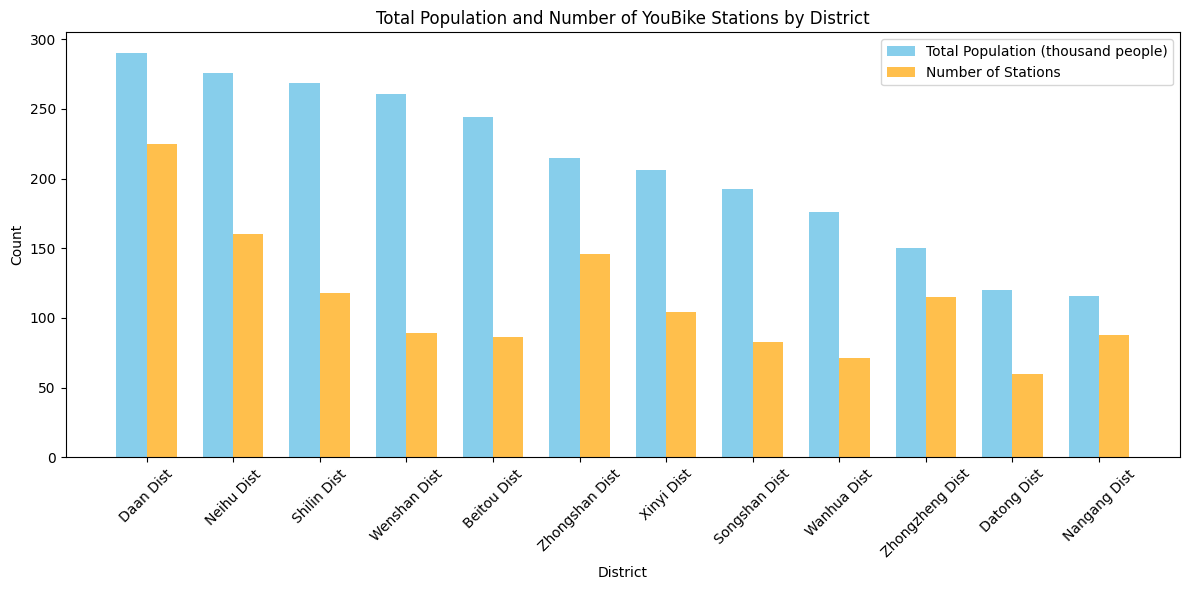

In [40]:
# Plotting

# Define the width of each bar
bar_width = 0.35

# Define the x-axis positions for each bar
x = np.arange(len(merged_df['sareaen']))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, merged_df['tot_population'], width=bar_width, color='skyblue', label='Total Population (thousand people)')
plt.bar(x + bar_width/2, merged_df['num_stations'], width=bar_width, color='orange', alpha=0.7, label='Number of Stations')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Total Population and Number of YouBike Stations by District')
plt.xticks(x, merged_df['sareaen'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation of the data

1. Insight from the patterns of the real-time YouBike 2.0 data:
   
   The number of bikes available in residential areas is usually less than
   the number of bikes available in commercial areas during day time.

3. Top 10 most used/busiest YouBike 2.0 stations are busy at different times throughout the day.
4. Districts with more populations do not necessarily guarantee more YouBike 2.0 stations.

### Research Question 

The goal of this project is to investigate how the intricate interplay between mobility patterns, population demographics, and the availability and utilization of YouBike 2.0 stations could inform optimal locations for mobile vendors in Taipei City, Taiwan. The research question revolves around uncovering the spatial and temporal dynamics that underlie these relationships across different districts of the city.

The methodology will involve the analysis of several datasets such as real-time YouBike 2.0 data, population statistics by district, Taipei Metro station traffic patterns, and possibly some commercial data as well. The availability and utilization records of YouBike 2.0 stations, particularly the top 10 busiest stations, are the main focus areas that we will use for our analyses. On the other hand, information on the distribution of population within Taipei’s districts will enable us to understand the demographics better.

Furthermore, the hourly inbound and outbound traffic data from Taipei Metro stations will be analyzed to uncover the movement patterns in the city. Such an investigation would produce useful information about the habits of people who live locally and visitors regarding their movement within this urban area. In other aspects, commercial statistics can be looked into further to establish a relationship between economic activities in different areas and how they shape mobility trends.

By conducting these analyses, we aim to determine the most suitable places for mobile vendors in Taipei City. These studies will take into account factors like population density, transportation patterns, and economic activity through different times to propose a more convenient and adaptive way of living in Taipei City.

### Taipei Metro Station Hourly Inbound and Outbound Traffic Statistics

In [33]:
endpoint_mrt_url = "https://data.taipei/api/v1/dataset/eb481f58-1238-4cff-8caa-fa7bb20cb4f4?scope=resourceAquire"
response_mrt = requests.get(endpoint_mrt_url)

In [34]:
results_mrt = response_mrt.text
print(type(results_mrt))
print(results_mrt[:500])

<class 'str'>
{"result":{"limit":20,"offset":0,"count":85,"sort":"","results":[{"_id":1,"_importdate":{"date":"2024-02-19 09:13:37.996318","timezone_type":3,"timezone":"Asia\/Taipei"},"seqno":"1","年月":"201701","url":"http:\/\/tcgmetro.blob.core.windows.net\/stationod\/%E8%87%BA%E5%8C%97%E6%8D%B7%E9%81%8B%E6%AF%8F%E6%97%A5%E5%88%86%E6%99%82%E5%90%84%E7%AB%99OD%E6%B5%81%E9%87%8F%E7%B5%B1%E8%A8%88%E8%B3%87%E6%96%99_201701.csv"},{"_id":2,"_importdate":{"date":"2024-02-19 09:13:38.007263","timezone_type":3,"timezo


In [35]:
# parse the string into a Python dictionary (loads = "load string")
data_mrt = json.loads(results_mrt)
print(type(data_mrt))
list_of_mrt_station = list(data_mrt.items())
pp.pprint(list_of_mrt_station[:3])

<class 'dict'>
[('result',
  {'count': 85,
   'limit': 20,
   'offset': 0,
   'results': [{'_id': 1,
                '_importdate': {'date': '2024-02-19 09:13:37.996318',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                'seqno': '1',
                'url': 'http://tcgmetro.blob.core.windows.net/stationod/%E8%87%BA%E5%8C%97%E6%8D%B7%E9%81%8B%E6%AF%8F%E6%97%A5%E5%88%86%E6%99%82%E5%90%84%E7%AB%99OD%E6%B5%81%E9%87%8F%E7%B5%B1%E8%A8%88%E8%B3%87%E6%96%99_201701.csv',
                '年月': '201701'},
               {'_id': 2,
                '_importdate': {'date': '2024-02-19 09:13:38.007263',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                'seqno': '2',
                'url': 'http://tcgmetro.blob.core.windows.net/stationod/%E8%87%BA%E5%8C%97%E6%8D%B7%E9%81%8B%E6%AF%8F%E6%97%A5%E5%88%86%E6%99%82%E5%90%84%E7%AB%99OD%E6%B5%81%E9%87%8F%E

In [36]:
results_mrt_list = list_of_mrt_station[0][1]['results']
df_mrt = pd.DataFrame(results_mrt_list)
df_mrt

,_id,_importdate,seqno,年月,url
0,1,"{'date': '2024-02-19 09:13:37.996318', 'timezo...",1,201701,http://tcgmetro.blob.core.windows.net/stationo...
1,2,"{'date': '2024-02-19 09:13:38.007263', 'timezo...",2,201702,http://tcgmetro.blob.core.windows.net/stationo...
2,3,"{'date': '2024-02-19 09:13:38.008925', 'timezo...",3,201703,http://tcgmetro.blob.core.windows.net/stationo...
3,4,"{'date': '2024-02-19 09:13:38.010403', 'timezo...",4,201704,http://tcgmetro.blob.core.windows.net/stationo...
4,5,"{'date': '2024-02-19 09:13:38.011946', 'timezo...",5,201705,http://tcgmetro.blob.core.windows.net/stationo...
5,6,"{'date': '2024-02-19 09:13:38.015106', 'timezo...",6,201706,http://tcgmetro.blob.core.windows.net/stationo...
6,7,"{'date': '2024-02-19 09:13:38.016567', 'timezo...",7,201707,http://tcgmetro.blob.core.windows.net/stationo...
7,8,"{'date': '2024-02-19 09:13:38.017934', 'timezo...",8,201708,http://tcgmetro.blob.core.windows.net/stationo...
8,9,"{'date': '2024-02-19 09:13:38.019276', 'timezo...",9,201709,http://tcgmetro.blob.core.windows.net/stationo...
9,10,"{'date': '2024-02-19 09:13:38.020864', 'timezo...",10,201710,http://tcgmetro.blob.core.windows.net/stationo...
